# Recommender System

In [1]:
#The two most common recommender System are content based and collaborative filtering 
#collaborative filtering produces recommendation based on knowledge of the user towards the item,it uses wisdom
#of crowd to recommend items.
#Content based Recommender System makes recommendation based on the smilarity of the item
#and it gives recommendation based on similarity

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [155]:
coloumn_names=['User_id','Item_id','Rating','Timestamp']

In [156]:
data=pd.read_csv('u.data',names=coloumn_names,sep='\t')

In [157]:
data.head()

,User_id,Item_id,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [158]:
data.shape
#Finding the number of rows and coloumns in the dataframe

(100000, 4)

In [159]:
data['Item_id'].describe()
#5 point Statistical Summary

count    100000.000000
mean        425.530130
std         330.798356
min           1.000000
25%         175.000000
50%         322.000000
75%         631.000000
max        1682.000000
Name: Item_id, dtype: float64

In [160]:
data1=pd.read_csv('u.item', error_bad_lines=False,encoding='latin-1',sep='|',names=coloumns)
#loading Uitem  in order to extract movie title

In [161]:
data1

,Item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [204]:
coloumns=['Item_id','movie title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation',"Children's", "Comedy","Crime",'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [163]:
data2=pd.DataFrame(data1['Item_id'],data1['movie title']

In [164]:
data1.drop(['release date','video release date','IMDb URL','unknown','Action','Adventure','Animation',"Children's", "Comedy","Crime",'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'],axis=1,inplace=True)

In [203]:
data1.head()

,Item_id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [166]:
df=pd.merge(data,data1,on='Item_id')

In [167]:
df.head()

,User_id,Item_id,Rating,Timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [205]:
df.groupby('movie title')['Rating'].mean().sort_values(ascending=False).head()
#grouping movie title based on ratings

movie title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Rating, dtype: float64

In [169]:
df['User_id'].value_counts().head()

405    737
655    685
13     636
450    540
276    518
Name: User_id, dtype: int64

In [171]:
ratings=pd.DataFrame(df.groupby('movie title')['Rating'].mean())
#grouping movie title basedon the mean of the rating

In [172]:
ratings['num of ratings']=pd.DataFrame(df.groupby('movie title')['Rating'].count())

In [173]:
ratings.head()

,Rating,num of ratings
movie title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


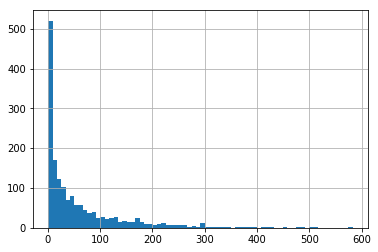

In [174]:
ratings['num of ratings'].hist(bins=70)
#visualisation of the number of rating

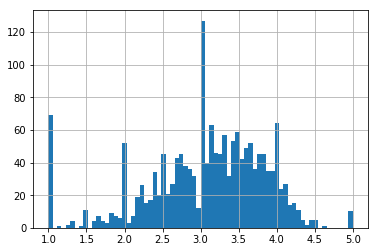

In [175]:
ratings['Rating'].hist(bins=70)
#Visualistion of rating 

/Users/shawryasharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/shawryasharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


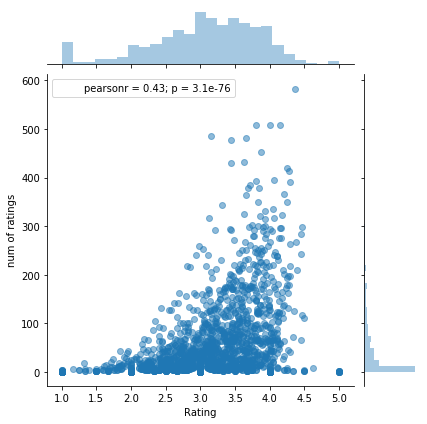

In [176]:
sns.jointplot(x='Rating',y='num of ratings',data=ratings,alpha=0.5)
#plotting a Scatter plot with x aix as rating and y axis num of rating given to a movie

In [177]:
# From the above visualisation we can conclude that he better the movie more people are going to watch it

In [178]:
movie_mat=df.pivot_table(index='User_id',columns='movie title',values='Rating')
#converting into a pivot 

In [179]:
movie_mat.head()
#viewing the pivot

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [180]:
Star_wars_user_rating=movie_mat['Star Wars (1977)']
Liar_Liar_user_rating=movie_mat['Liar Liar (1997)']

In [181]:
Star_wars_user_rating.head()

User_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [182]:
similar_to_starwrs=movie_mat.corrwith(Star_wars_user_rating)
#finding Corealtion of a particular movie with other movies 

/Users/shawryasharma/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/shawryasharma/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [193]:
similar_to_liarliar=movie_mat.corrwith(Liar_Liar_user_rating)
#finding movies that are corelated with Liar Liar

/Users/shawryasharma/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/shawryasharma/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [194]:
corr_starwars=pd.DataFrame(similar_to_starwrs,columns=['Corelations'])
corr_starwars.dropna(inplace=True)
#Putting into dataframe and according corresponding to the corealtion

In [195]:
corr_starwars.head()

,Corelations
movie title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [196]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [197]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Corelations',ascending=False).head()
#If you have watched Star Wars the following movies you should be likely to watch

,Corelations,num of ratings
movie title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [198]:
corr_Liar_Liar=pd.DataFrame(similar_to_liarliar,columns=['Corelations'])


In [199]:
corr_Liar_Liar.dropna(inplace=True)

In [200]:
corr_Liar_Liar.head()

,Corelations
movie title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [201]:
corr_Liar_Liar=corr_Liar_Liar.join(ratings['num of ratings'])

In [206]:
corr_Liar_Liar[corr_Liar_Liar['num of ratings']>100].sort_values('Corelations',ascending=False).head()
#If you have watched Liar o Liar Following movie you are likely to watch

,Corelations,num of ratings
movie title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
